# SIGNATURE BASED INTRUSION DETECTION SYSTEM

## Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

## Reading the Dataset

In [6]:
df = pd.read_csv("/content/drive/MyDrive/MachineLearning/MTH-IDS/kddcup99/kddcup99_sampledataset.csv")

### Train Test Split

In [7]:
train, test = train_test_split(df, test_size = 0.2)

### Attack Class Distribution

In [8]:
train['Attack'].value_counts()

18    40214
9     15664
11    13978
10     1874
0      1762
21      810
20      792
17      226
14      218
5       173
15      146
3        46
1        24
6        18
22       15
4        10
16        7
2         7
7         7
8         5
13        4
19        2
12        2
Name: Attack, dtype: int64

### Standardizing the Data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [10]:
enctrain = sc_traindf
enctrain.shape

(76004, 38)

In [11]:
train_x = sc_traindf
train_y = train['Attack']

## Feature Engineering

### Using Mean Decrease in Impurity

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

rfc.fit(train_x, train_y);

### Extract Important feature from it

In [13]:
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

### Plotting the importances

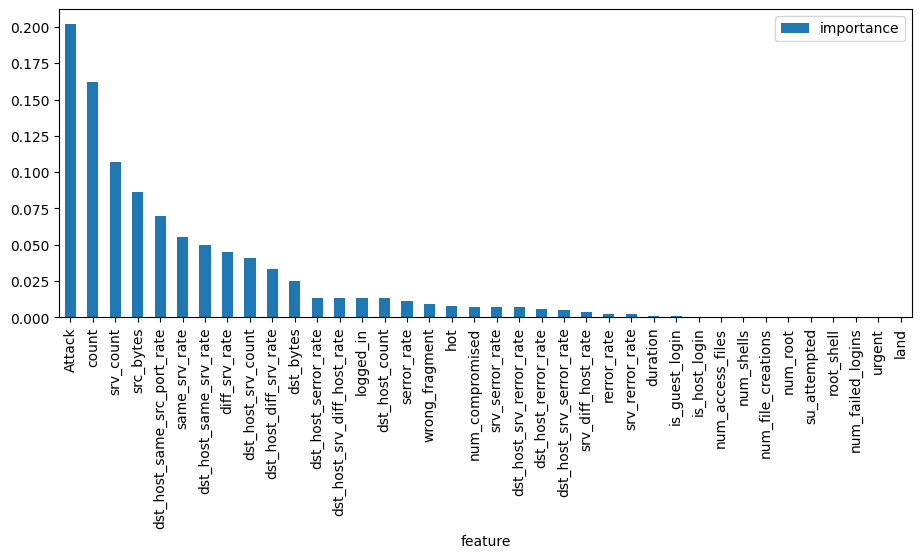

In [14]:
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

## Selecting 30 feature from it

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=30)
rfe = rfe.fit(train_x, train_y)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['Src Port',
 'Dst Port',
 'Flow Duration',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Std',
 'Flow IAT Max',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Max',
 'Bwd IAT Tot',
 'Bwd IAT Max',
 'Fwd Header Len',
 'Bwd Header Len',
 'Bwd Pkts/s',
 'Pkt Len Std',
 'Fwd Seg Size Avg',
 'Subflow Fwd Byts',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Seg Size Min',
 'Idle Mean',
 'Idle Max',
 'Idle Min',
 'Label',
 'Attack']

In [ ]:
train_x_df = pd.DataFrame(train_x, columns=selected_features)             #updated.
train_y_df = pd.DataFrame(train_y, columns=selected_features)

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

## Importing the Classifiers

In [16]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train);

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
X_train_array = X_train.values
X_test_array = X_test.values

### Training Accuracies

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier


============================== Naive Bayes Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9395324279030597

Model Accuracy:
 0.9402466072704033

Confusion matrix:
 [[ 1232     0     0     1     0     0     0     0     0     0     0     5
      0     0     0     0     0     0     0     0     0     0     0]
 [    0    12     0     0     0     0     0     0     0     0     0     6
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     1     0     0     2     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    28     1     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     3     0     0     0     0     0     5     1
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   120     0     0     0     0     0     1
 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9999060185701992

Model Accuracy:
 1.0

Confusion matrix:
 [[ 1238     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0    18     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     4     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    30     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     9     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   126     0     0     0     0     0     0
      0     0 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defi


============================== KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9979135903562704

Model Accuracy:
 0.9985902785609564

Confusion matrix:
 [[ 1238     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0    16     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     1     2     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    30     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     7     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     1     0     0   122     0     0     0     0     1     1
   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined an


============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9977068552324244

Model Accuracy:
 0.998439908274125

Confusion matrix:
 [[ 1238     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0    18     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     1     1     0     0     2     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    30     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     8     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   120     0     0     0     0     5     1
      

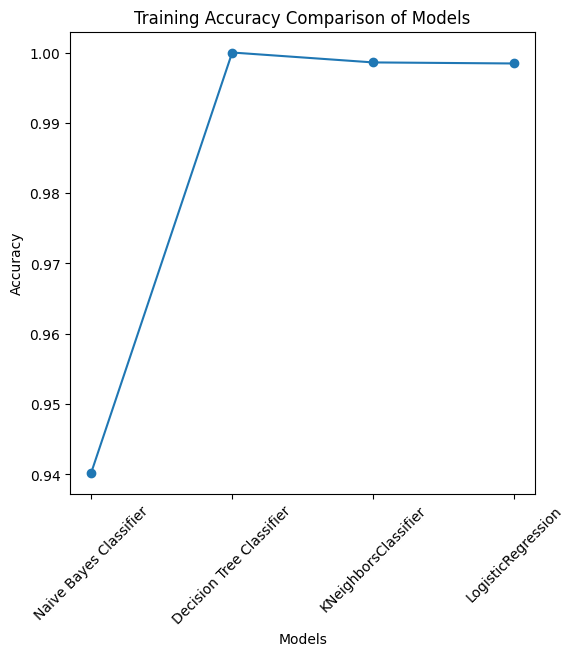

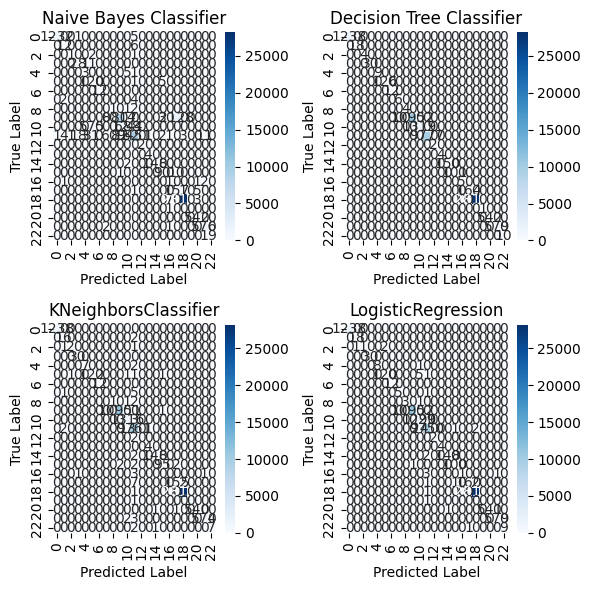

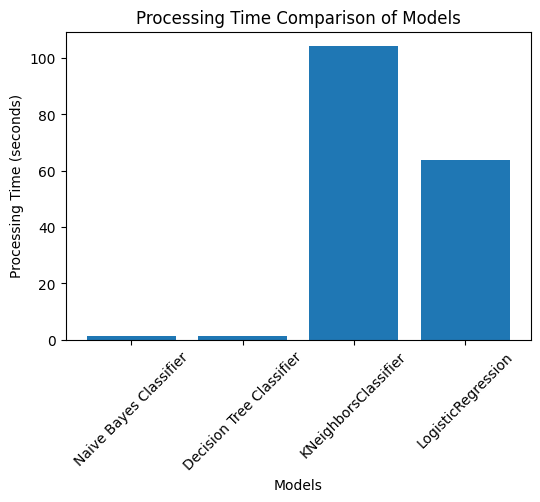

In [18]:
from sklearn import metrics
import time

models = []
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

accuracy_scores = []
confusion_matrices = []
processing_times = []

for i, v in models:
    start_time = time.time()  # Start measuring time

    scores = cross_val_score(v, X_train_array, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train_array))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train_array))
    classification = metrics.classification_report(Y_train, v.predict(X_train_array))

    end_time = time.time()  # Stop measuring time
    processing_time = end_time - start_time
    processing_times.append(processing_time)

    accuracy_scores.append(accuracy)
    confusion_matrices.append(confusion_matrix)

    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print("Cross Validation Mean Score:\n", scores.mean())
    print()
    print("Model Accuracy:\n", accuracy)
    print()
    print("Confusion matrix:\n", confusion_matrix)
    print()
    print("Classification report:\n", classification)
    print("Processing Time: {:.4f} seconds".format(processing_time))
    print()

# Plotting line curve for accuracy values
plt.figure(figsize=(6, 6))
models_names = [model[0] for model in models]
plt.plot(models_names, accuracy_scores, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Comparison of Models')
plt.xticks(rotation=45)
plt.show()

# Creating heatmap for confusion matrices
plt.figure(figsize=(6, 6))
for i, matrix in enumerate(confusion_matrices):
    plt.subplot(2, 2, i+1)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(models[i][0])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Displaying processing times as a bar graph
plt.figure(figsize=(6, 4))
plt.bar(models_names, processing_times)
plt.xlabel('Models')
plt.ylabel('Processing Time (seconds)')
plt.title('Processing Time Comparison of Models')
plt.xticks(rotation=45)
plt.show()

In [20]:
from sklearn.ensemble import VotingClassifier

# Define the voting classifier
voting_clf = VotingClassifier(estimators=models, voting='hard')

model_training_times = []
start_time = time.time()  # Start the timer
# Train the voting classifier
voting_clf.fit(X_train, Y_train)
end_time = time.time()  # Stop the timer
training_time = end_time - start_time  # Calculate training time

# Add the ensemble model's training time to the overall training time
model_training_times.append(training_time)
# Calculate the total training time by summing the individual model training times
overall_training_time = sum(model_training_times)

# Evaluate the voting classifier
scores = cross_val_score(voting_clf, X_train_array, Y_train, cv=10)
accuracy = metrics.accuracy_score(Y_train, voting_clf.predict(X_train_array))
confusion_matrix = metrics.confusion_matrix(Y_train, voting_clf.predict(X_train_array))
classification = metrics.classification_report(Y_train, voting_clf.predict(X_train_array))

print()
print('============================== Ensemble Model Evaluation ==============================')
print()
print("Cross Validation Mean Score:" "\n", scores.mean())
print()
print("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification)
print()
print(f"Training Time for Ensemble Model: {overall_training_time} seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 


============================== Ensemble Model Evaluation ==============================

Cross Validation Mean Score:
 0.9989098203599583

Model Accuracy:
 0.9993985188526747

Confusion matrix:
 [[ 1238     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0    18     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     1     3     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    30     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     9     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   125     0     0     0     0     0     0
      0     0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Testing Accuracies

In [21]:
model_testing_times = []
for i, v in models:
    start_time = time.time()  # Start the timer
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test_array))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test_array))
    classification = metrics.classification_report(Y_test, v.predict(X_test_array))
    end_time = time.time()  # Stop the timer
    testing_time = end_time - start_time  # Calculate training time
    model_testing_times.append(testing_time)  # Store the training time

    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in la


============================== Naive Bayes Classifier Model Test Results ==============================

Model Accuracy:
 0.9427681782299798

Confusion matrix:
 [[  520     0     0     1     0     0     0     0     0     0     0     3
      0     0     0     0     0     0     0     0     0     0]
 [    0     5     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     1     0    15     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0    43     0     0     0     0     0     0
      0     0     4     0     0     0     0     0     0     0]
 [    0     0   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local


============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.9976756424875011

Confusion matrix:
 [[  521     1     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0]
 [    0     4     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     3
      0     0     0     0     0     0     0     0     0]
 [    0     0     0    15     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     1     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0     2     0     0    43     0     0     0     0     0     0
      0     2     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     6     0     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [22]:
from sklearn.ensemble import VotingClassifier

# Define the voting classifier
voting_clf = VotingClassifier(estimators=models, voting='hard')

start_time = time.time()  # Start the timer
# Train the voting classifier
voting_clf.fit(X_test, Y_test)
end_time = time.time()  # Stop the timer
testing_time = end_time - start_time  # Calculate training time

# Add the ensemble model's training time to the overall training time
model_testing_times.append(testing_time)
# Calculate the total training time by summing the individual model training times
overall_testing_time = sum(model_testing_times)

# Evaluate the voting classifier
scores = cross_val_score(voting_clf, X_test_array, Y_test, cv=10)
accuracy = metrics.accuracy_score(Y_test, voting_clf.predict(X_test_array))
confusion_matrix = metrics.confusion_matrix(Y_test, voting_clf.predict(X_test_array))
classification = metrics.classification_report(Y_test, voting_clf.predict(X_test_array))

print()
print('============================== Ensemble Model Evaluation ==============================')
print()
print("Cross Validation Mean Score:" "\n", scores.mean())
print()
print("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification)
print()
print()
print(f"Testing Time for Ensemble Model: {overall_testing_time} seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 


============================== Ensemble Model Evaluation ==============================

Cross Validation Mean Score:
 0.9983773852650039

Model Accuracy:
 0.9992105955617928

Confusion matrix:
 [[  524     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    1     5     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0     3     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0     0    16     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0    46     0     0     0     0     0     0
      0     1     0     0     0     0     0     0     0]
 [    0     0     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
